In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans

In [3]:
df=pd.read_csv(r"C:\Users\prana\OneDrive\Desktop\Data_Analytics Project\airlines_flights_data.csv")

In [4]:
print(df.shape)   #shows no of rows and columns 

(300153, 12)


In [5]:
print(df.dtypes)  #shows data types 


index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


In [6]:
print(df.head()) #Show first 5 values

   index   airline   flight source_city departure_time stops   arrival_time  \
0      0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1      1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2      2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3      3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4      4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [12]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [13]:
df.isna().sum()    #Finds missing values and gives count

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [14]:
df.isnull().sum()  #Finds null values and gives count of it

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [19]:
df.duplicated().sum()     #Finds duplicated values and gives count of it

0

In [20]:
df.describe()       


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


 Q.1 What are the airlines in the dataset, accompanied by their frequencies?

In [27]:
df['airline'].value_counts(ascending=True)

SpiceJet       9011
AirAsia       16098
GO_FIRST      23173
Indigo        43120
Air_India     80892
Vistara      127859
Name: airline, dtype: int64

Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

In [33]:
departure_counts = df["departure_time"].value_counts()
arrival_counts = df["arrival_time"].value_counts()

print(departure_counts)
print("##############################################################")
print(departure_counts)

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
##############################################################
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


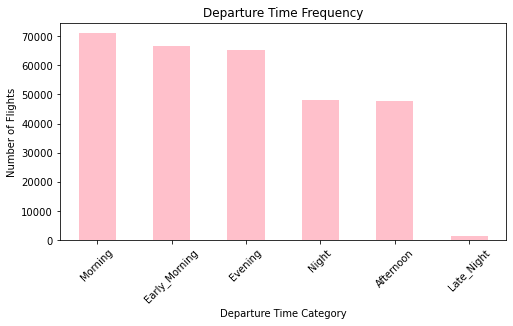

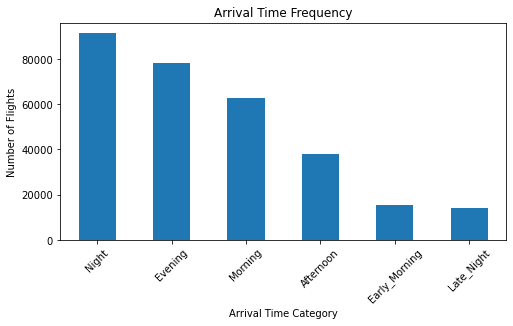

In [36]:
plt.figure(figsize=(8,4))
departure_counts.plot(kind="bar",color="pink")
plt.title("Departure Time Frequency")
plt.xlabel("Departure Time Category")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

# Plot 2: Arrival Time Bar Graph
plt.figure(figsize=(8,4))
arrival_counts.plot(kind="bar")
plt.title("Arrival Time Frequency")
plt.xlabel("Arrival Time Category")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()

Source Count And Destination Count And Their Graph

In [37]:
source_counts = df["source_city"].value_counts()
dest_counts = df["destination_city"].value_counts()

source_counts, dest_counts

(Delhi        61343
 Mumbai       60896
 Bangalore    52061
 Kolkata      46347
 Hyderabad    40806
 Chennai      38700
 Name: source_city, dtype: int64,
 Mumbai       59097
 Delhi        57360
 Bangalore    51068
 Kolkata      49534
 Hyderabad    42726
 Chennai      40368
 Name: destination_city, dtype: int64)

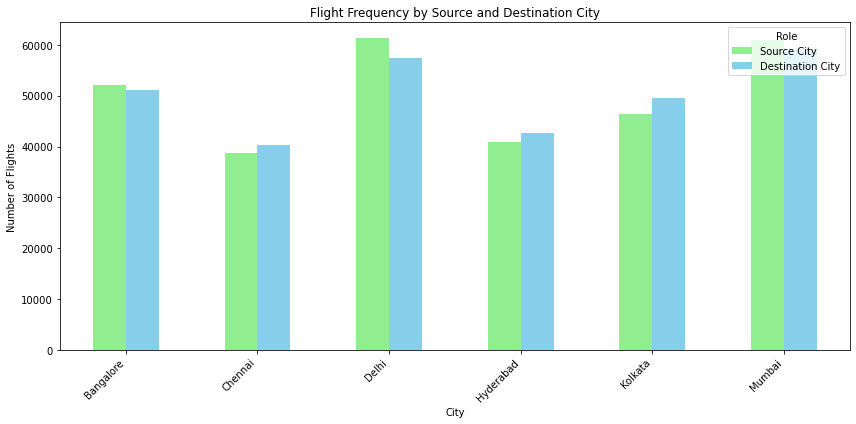

In [42]:
combined_counts = pd.DataFrame({
    'Source City': source_counts,
    'Destination City': dest_counts
}).fillna(0)

plt.figure(figsize=(12, 6))


combined_counts.plot(kind="bar", ax=plt.gca(), color=['lightgreen', 'skyblue'])

plt.title("Flight Frequency by Source and Destination City")
plt.xlabel("City")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha='right') 
plt.legend(title="Role", loc="upper right") 
plt.tight_layout()

plt.show()

Q.4. Does price varies with airlines ?

In [43]:
airline_price = df.groupby("airline")["price"].mean().sort_values()
airline_price

airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64

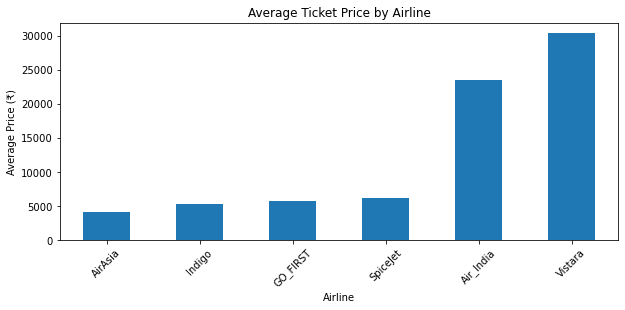

In [44]:
plt.figure(figsize=(10,4))
airline_price.plot(kind="bar")
plt.title("Average Ticket Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45)
plt.show()

Q5: Does ticket price change based on the departure time and arrival time?

In [45]:
departure_price = df.groupby("departure_time")["price"].mean().sort_values()
arrival_price = df.groupby("arrival_time")["price"].mean().sort_values()

departure_price, arrival_price

(departure_time
 Late_Night        9295.299387
 Afternoon        18179.203331
 Early_Morning    20370.676718
 Evening          21232.361894
 Morning          21630.760254
 Night            23062.146808
 Name: price, dtype: float64,
 arrival_time
 Late_Night       11284.906078
 Early_Morning    14993.139521
 Afternoon        18494.598993
 Night            21586.758341
 Morning          22231.076098
 Evening          23044.371615
 Name: price, dtype: float64)

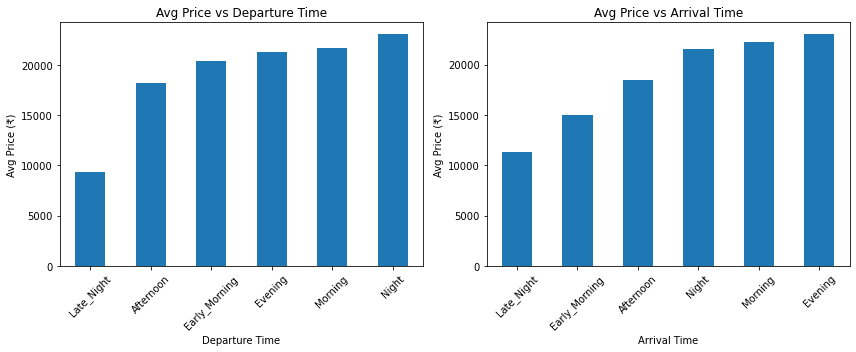

In [46]:
# Plot merged chart
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
departure_price.plot(kind="bar")
plt.title("Avg Price vs Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Avg Price (₹)")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
arrival_price.plot(kind="bar")
plt.title("Avg Price vs Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Avg Price (₹)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 Q6:How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [47]:
near_departure = df[df["days_left"] <= 2]["price"]
others = df[df["days_left"] > 2]["price"]

near_avg = near_departure.mean()
others_avg = others.mean()

near_avg, others_avg

(27421.169326390056, 20757.498484024472)

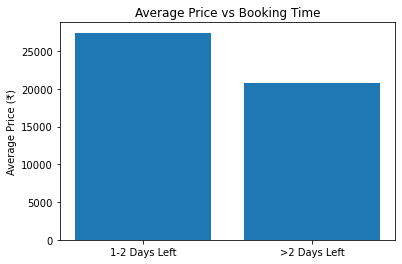

In [49]:
plt.figure(figsize=(6,4))
plt.bar(["1-2 Days Left", ">2 Days Left"], [near_avg, others_avg])
plt.title("Average Price vs Booking Time")
plt.ylabel("Average Price (₹)")
plt.show()

Q7:Which routes are the most profitable or high-ticket routes?

In [50]:
df["route"] = df["source_city"] + " → " + df["destination_city"]


route_price = df.groupby("route")["price"].mean().sort_values(ascending=False)


top_routes = route_price.head(10)
top_routes

route
Chennai → Bangalore    25081.850454
Kolkata → Chennai      23660.361040
Bangalore → Kolkata    23500.061229
Bangalore → Chennai    23321.850078
Mumbai → Bangalore     23147.873807
Bangalore → Mumbai     23128.618672
Mumbai → Chennai       22781.899112
Chennai → Mumbai       22765.849647
Kolkata → Bangalore    22744.808428
Chennai → Kolkata      22669.932407
Name: price, dtype: float64

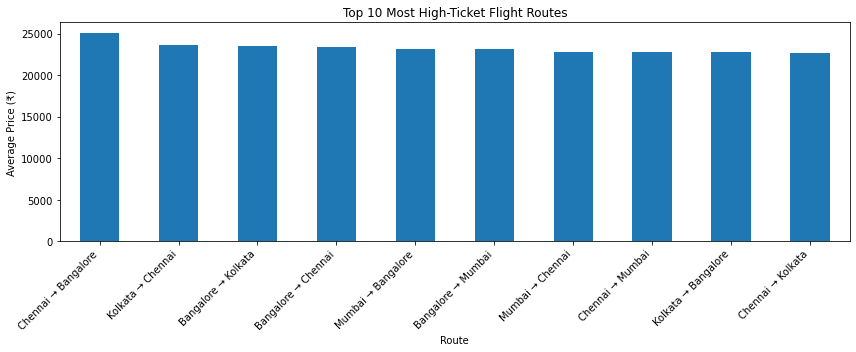

In [51]:
plt.figure(figsize=(12,5))
top_routes.plot(kind="bar")
plt.title("Top 10 Most High-Ticket Flight Routes")
plt.xlabel("Route")
plt.ylabel("Average Price (₹)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
# Save cleaned file to your local folder
df.to_csv(r"C:\Users\prana\OneDrive\Desktop\Data_Analytics Project\cleaned_flight_data.csv", index=False)
